In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.drop('User ID', axis =1 ,inplace = True)

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [8]:
sex = pd.get_dummies(df['Gender'], drop_first =True)

In [9]:
sex

,Male
0,1
1,1
2,0
3,0
4,1
5,1
6,0
7,0
8,1
9,0


In [13]:
df = pd.concat([df,sex], axis =1)

In [14]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [15]:
df.drop('Gender', axis=1, inplace=True)

In [16]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [17]:
df.corr()

,Age,EstimatedSalary,Purchased,Male
Age,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.155238,1.000000,0.362083,-0.060435
Purchased,0.622454,0.362083,1.000000,-0.042469
Male,-0.073741,-0.060435,-0.042469,1.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

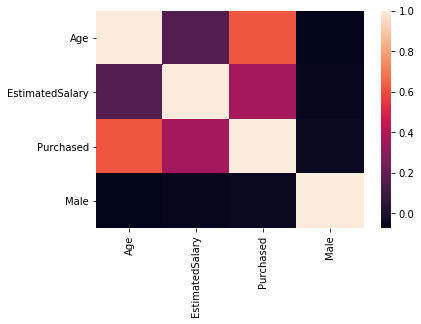

In [20]:
sns.heatmap(df.corr())

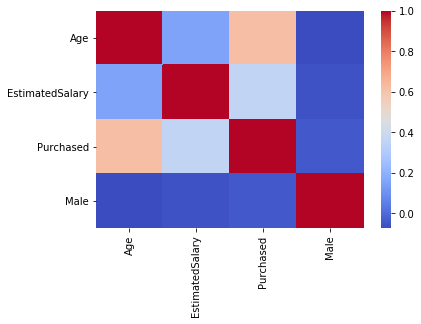

In [22]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [23]:
df.drop('Male', axis=1, inplace=True)  # since there is 0 correlation of Male column with Purchased so we will drop it.

In [24]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


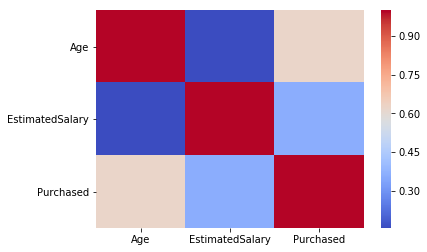

In [25]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [26]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [27]:
df.mean()

Age                   37.6550
EstimatedSalary    69742.5000
Purchased              0.3575
dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler

In [32]:
ss = StandardScaler()

In [33]:
scaled_array = ss.fit_transform(df.drop('Purchased', axis =1))

In [ ]:
`

In [35]:
scaled_array.shape

(400, 2)

In [36]:
X = pd.DataFrame(data = scaled_array, columns = df.columns[:-1])

In [37]:
X.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [38]:
y = df['Purchased']

In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [40]:
X.mean()

Age               -2.331468e-16
EstimatedSalary   -1.193490e-17
dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [43]:
X_train.shape

(280, 2)

In [44]:
X_test.shape

(120, 2)

In [45]:
y_train.shape

(280,)

In [46]:
X_test.shape

(120, 2)

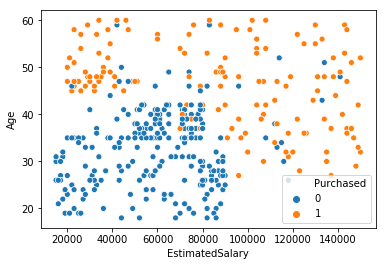

In [52]:
sns.scatterplot(x = 'EstimatedSalary', y = 'Age', data = df, hue = 'Purchased')

In [53]:
from sklearn.svm import SVC

In [54]:
classifier = SVC()

In [56]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
ypred = classifier.predict(X_test)

In [59]:
y_test

232    1
302    1
115    0
114    0
88     0
107    0
297    1
262    1
276    0
310    0
254    0
274    1
288    0
305    0
89     0
326    0
371    1
251    0
270    0
242    1
298    0
22     1
133    0
379    1
120    0
136    0
134    0
46     0
182    1
236    0
      ..
243    1
95     0
43     0
63     1
238    0
350    1
279    1
335    0
197    0
184    0
177    0
347    1
195    0
96     0
381    1
52     0
311    1
157    0
5      0
108    0
50     0
193    0
163    0
248    0
240    1
141    0
194    0
51     0
7      1
154    0
Name: Purchased, Length: 120, dtype: int64

In [68]:
from sklearn.metrics import confusion_matrix,classification_report

In [61]:
cm = confusion_matrix(y_test, ypred)

In [62]:
cm

array([[73,  6],
       [ 4, 37]], dtype=int64)

In [63]:
(73+37)/120

0.9166666666666666

In [64]:
y_test.value_counts()  # it will give 0's and 1's total values

0    79
1    41
Name: Purchased, dtype: int64

In [69]:
classification_report(y_test, ypred)

'             precision    recall  f1-score   support\n\n          0       0.95      0.92      0.94        79\n          1       0.86      0.90      0.88        41\n\navg / total       0.92      0.92      0.92       120\n'

In [70]:
print(classification_report(y_test, ypred))

             precision    recall  f1-score   support

          0       0.95      0.92      0.94        79
          1       0.86      0.90      0.88        41

avg / total       0.92      0.92      0.92       120

